# Team-G4-ExcelR-P53

# To predict loan status



### Business Objective:
To predict the impact of the incident raised by the customer.

### Data Set Details:
It’s not at all easy to get a loan from the bank. Getting a loan approved requires a complex mix of factors not the least of which is a steady income! So this ML project aims **to create a model that will classify how much loan the user can obtain** based on various factors such as the user’s marital status, income, education, employment prospects, number of dependents, etc. The dataset attached provides details about all these factors which can then be used to create an ML model that demonstrates the amount of loan that can be approved

In [1]:
#Importing important libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Import da
loan = pd.read_csv("train.csv"ta)


# Exploratory Data Analysis-(EDA)

In [4]:
# look the data
loan.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [5]:
#check no. of rows and columns
loan.shape

(614, 13)

Inference:
       There are 614 records and 13 features.

In [6]:
loan.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


There are some missing values in  data,we will handle as go along.

In [7]:
#Count distinct observations without NaN values.
loan.nunique()

Loan_ID              614
Gender                 2
Married                2
Dependents             4
Education              2
Self_Employed          2
ApplicantIncome      505
CoapplicantIncome    287
LoanAmount           203
Loan_Amount_Term      10
Credit_History         2
Property_Area          3
Loan_Status            2
dtype: int64

nference:
Most of the categorical variables have a relatively small number of unique entries. We will need to find a way to deal with these categorical variables.

In [8]:
#Checking the null Values in Data

loan.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [9]:
#Function to calculate missing values by column function
def miss_value_table(df):
    
    # Total missing value
    miss_value=df.isnull().sum()
    
    # Percentage of missing values
    percent_miss_value=(miss_value/len(df))*100
    
    # Make the table with results
    miss_value_table=pd.concat([miss_value, percent_miss_value],axis=1)
    
    # rename the table
    miss_value_table_columns=miss_value_table.rename({0:'Missing Values',1 : '% of Total Values'},axis=1)
    
    # Remove column names which does not have null value and sorting columns with percentage of missing values
    miss_value_table_columns=miss_value_table_columns[miss_value_table_columns.iloc[:,1]!=0].sort_values('% of Total Values',ascending=False).round(1)
    
    return miss_value_table_columns
    

In [10]:
# Missing value statistics
missing_values=miss_value_table(loan)
missing_values

,Missing Values,% of Total Values
Credit_History,50,8.1
Self_Employed,32,5.2
LoanAmount,22,3.6
Dependents,15,2.4
Loan_Amount_Term,14,2.3
Gender,13,2.1
Married,3,0.5


#### Inference:
When it comes time to build our machine learning models, we will have to fill in these missing values (known as imputation). 

#### Column Types

Let's look at the number of columns of each data type. int64 and float64 are numeric variables (which can be either discrete or continuous). object columns contain strings and are categorical features. .



In [12]:
loan.dtypes.value_counts()

object     8
float64    4
int64      1
dtype: int64

In [13]:
# unique classes in each object columns
object_var=loan.select_dtypes('object').columns
object_var=object_var[1:]
unique_values=[]
for i in range(0,7):
    unique_values.append(loan[object_var[i]].unique())
object_var_table=pd.DataFrame({"Object_variable":object_var,"Unique_Values":unique_values})
object_var_table

,Object_variable,Unique_Values
0,Gender,"[Male, Female, nan]"
1,Married,"[No, Yes, nan]"
2,Dependents,"[0, 1, 2, 3+, nan]"
3,Education,"[Graduate, Not Graduate]"
4,Self_Employed,"[No, Yes, nan]"
5,Property_Area,"[Urban, Rural, Semiurban]"
6,Loan_Status,"[Y, N]"


Inference:
There are nan value in some objective variable and there is one value with special character i.e. '3+'. We have to remove this special character from this value.

In [15]:
#describe the numeric columns
loan.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [17]:
# describe the chategoric columns
loan.describe(include=['O'])

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
count,614,601,611,599,614,582,614,614
unique,614,2,2,4,2,2,3,2
top,LP002961,Male,Yes,0,Graduate,No,Semiurban,Y
freq,1,489,398,345,480,500,233,422


# Data visualization

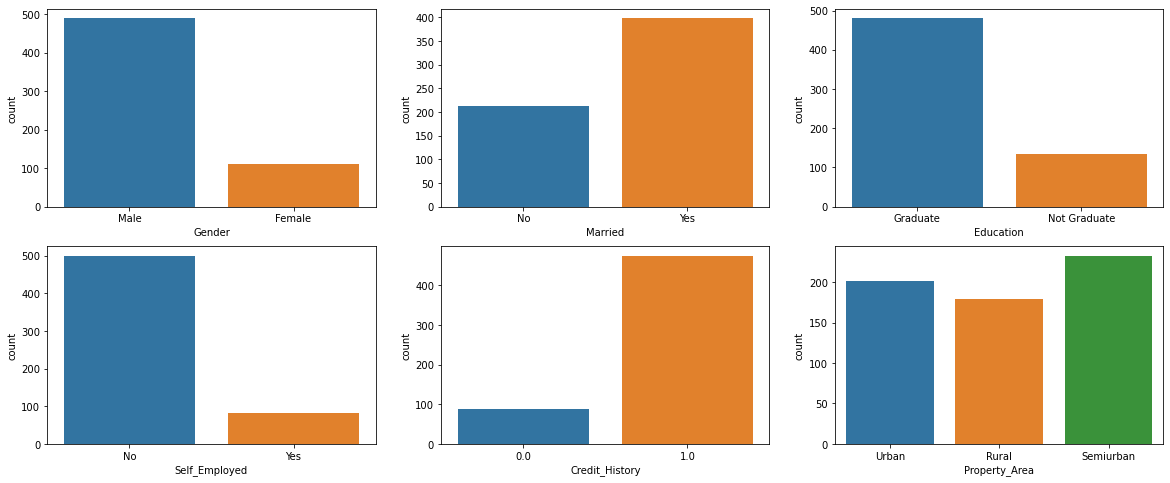

In [19]:
#Univariate Analysis
plt.figure(figsize=(20,8))
plt.subplot(231);sns.countplot('Gender',data=loan)
plt.subplot(232);sns.countplot('Married',data=loan)
plt.subplot(233);sns.countplot('Education',data=loan)
plt.subplot(234);sns.countplot('Self_Employed',data=loan)
plt.subplot(235);sns.countplot('Credit_History',data=loan)
plt.subplot(236);sns.countplot('Property_Area',data=loan)
plt.show()

Mostly, those who Male, Married, Graduated, Not Self_Employed they applied for Loan.
Those who a high Credit_History (1.0) they mostly applied for Loan.
From any Property_Area people applied for Loan.

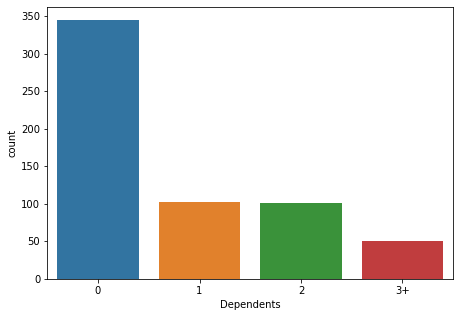

In [21]:
plt.figure(figsize=(16,5))
plt.subplot(121);sns.countplot('Dependents',data=loan)
plt.show()

Mostly those who Independent they applied for Loan

<AxesSubplot:xlabel='Gender', ylabel='count'>

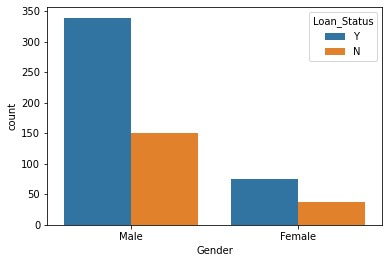

In [22]:
sns.countplot('Gender',hue='Loan_Status',data=loan)

Mostly Male have applied for Loan and got the loan approved too.

<AxesSubplot:xlabel='Married', ylabel='count'>

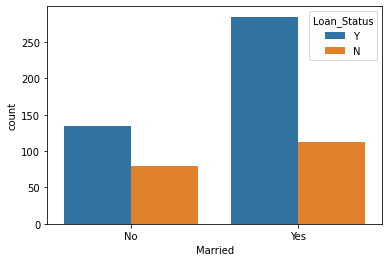

In [23]:
sns.countplot('Married',hue='Loan_Status',data=loan)

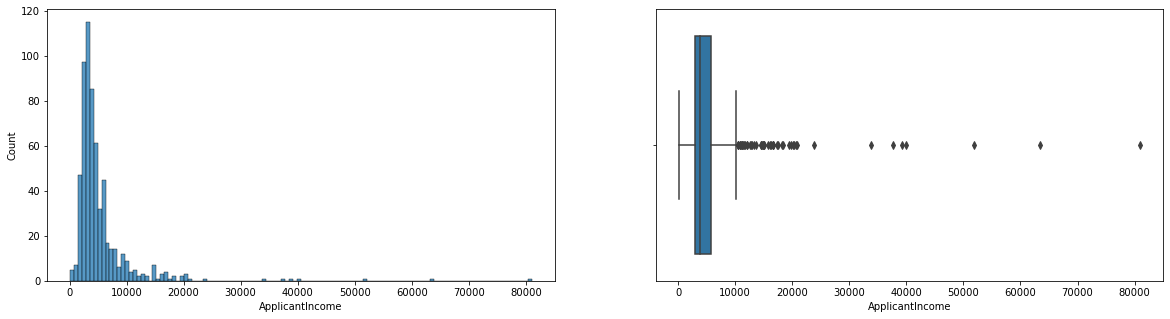

In [24]:
plt.figure(figsize=(20,5));plt.subplot(121); sns.histplot(loan['ApplicantIncome']);plt.subplot(122);sns.boxplot(loan['ApplicantIncome'])
plt.show()

Our data is Not Normal (Right Skewed) and Huge Outliers in ApplicantIncome.

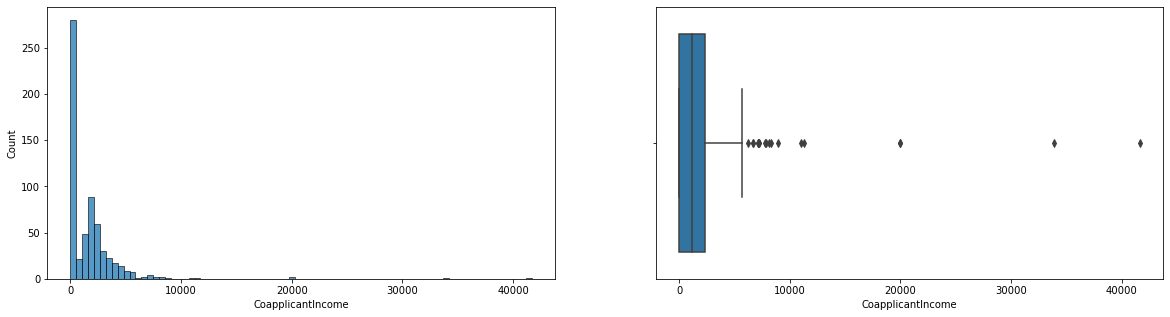

In [26]:
plt.figure(figsize=(20,5));plt.subplot(121); sns.histplot(loan['CoapplicantIncome']);plt.subplot(122);sns.boxplot(loan['CoapplicantIncome'])
plt.show()

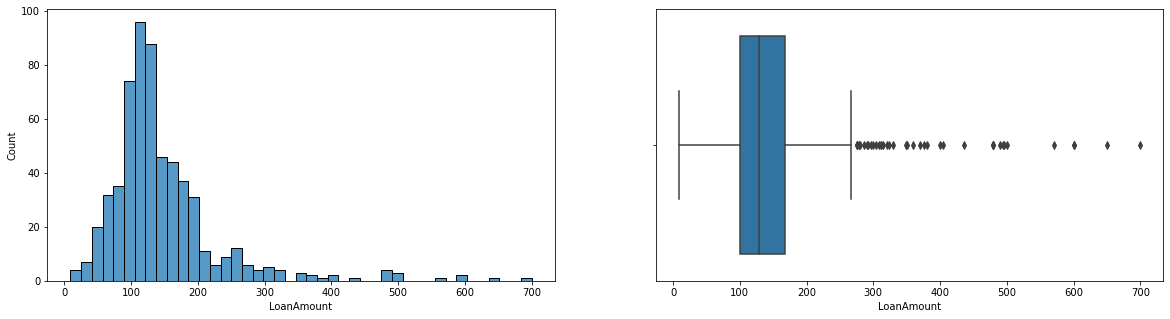

In [27]:
plt.figure(figsize=(20,5));plt.subplot(121); sns.histplot(loan['LoanAmount']);plt.subplot(122);sns.boxplot(loan['LoanAmount'])
plt.show()

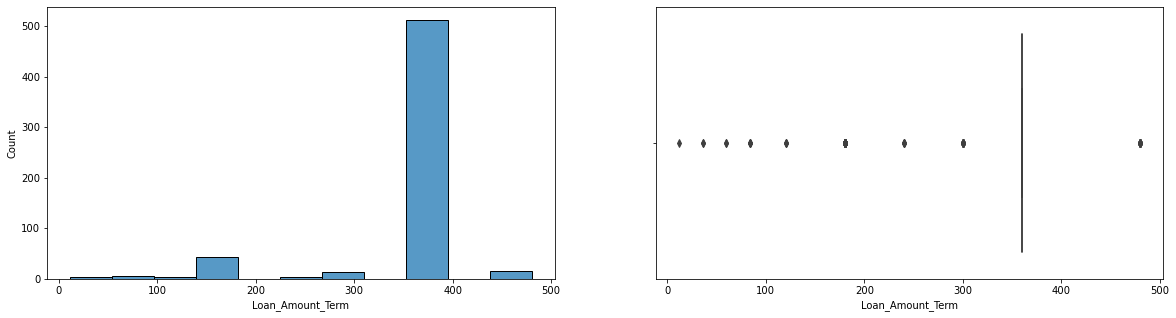

In [29]:
plt.figure(figsize=(20,5));plt.subplot(121); sns.histplot(loan['Loan_Amount_Term']);plt.subplot(122);sns.boxplot(loan['Loan_Amount_Term'])
plt.show()

<AxesSubplot:xlabel='ApplicantIncome', ylabel='Density'>

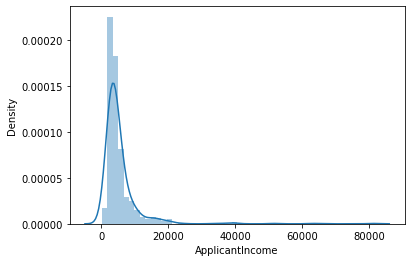

In [30]:
sns.distplot(loan['ApplicantIncome'])

<AxesSubplot:xlabel='ApplicantIncome', ylabel='Density'>

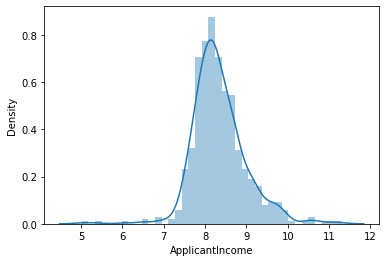

In [31]:
sns.distplot(np.log(loan['ApplicantIncome']))

<AxesSubplot:xlabel='CoapplicantIncome', ylabel='Density'>

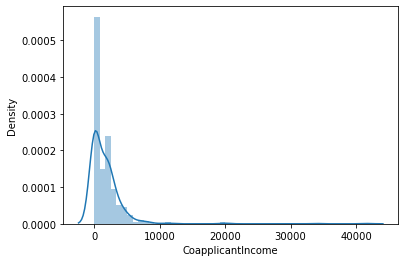

In [32]:
sns.distplot(loan['CoapplicantIncome'])

<AxesSubplot:xlabel='CoapplicantIncome', ylabel='Density'>

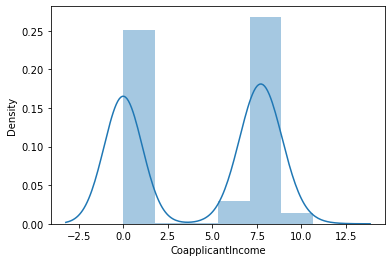

In [33]:
sns.distplot(np.log(loan['CoapplicantIncome']+1))

<AxesSubplot:xlabel='LoanAmount', ylabel='Density'>

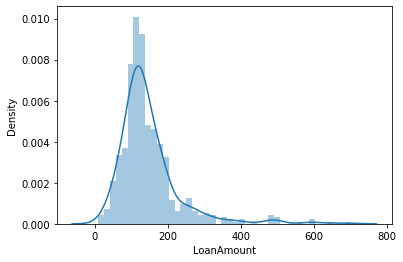

In [34]:
sns.distplot(loan['LoanAmount'])

<AxesSubplot:xlabel='LoanAmount', ylabel='Density'>

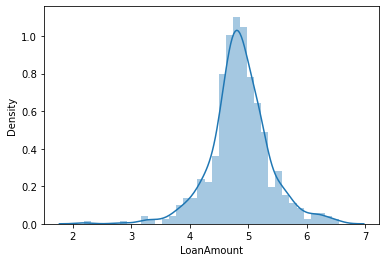

In [35]:
sns.distplot(np.log(loan['LoanAmount']))

<AxesSubplot:xlabel='Loan_Amount_Term', ylabel='Density'>

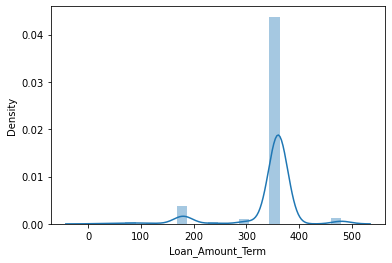

In [36]:
sns.distplot(loan['Loan_Amount_Term'])

<AxesSubplot:xlabel='Loan_Amount_Term', ylabel='Density'>

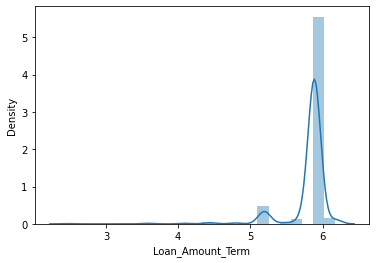

In [37]:
sns.distplot(np.log(loan['Loan_Amount_Term']))

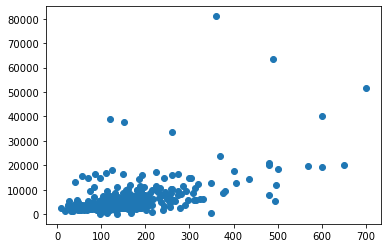

In [39]:
plt.scatter('LoanAmount','ApplicantIncome',data=loan)

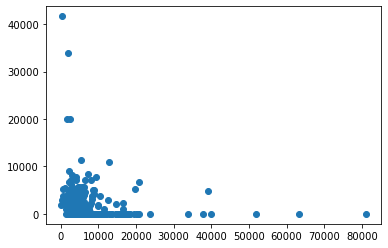

In [40]:
plt.scatter('ApplicantIncome','CoapplicantIncome',data=loan)

Y    422
N    192
Name: Loan_Status, dtype: int64


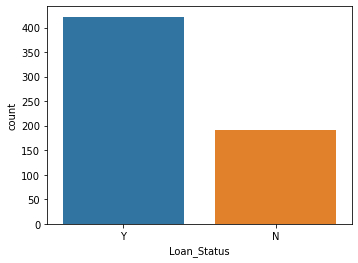

In [38]:
# Targate Vaariable
plt.figure(figsize=(12,4));plt.subplot(122);sns.countplot(loan['Loan_Status'])#check our data is balanced or not
print(loan['Loan_Status'].value_counts())

<AxesSubplot:ylabel='Dependents'>

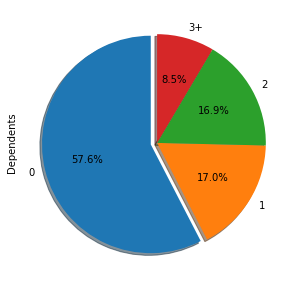

In [43]:
loan.Dependents.value_counts().plot.pie(startangle=90,shadow=True,explode=(0.06,0,0,0),autopct='%1.1f%%',figsize=(5,5))

Large number of applicants don't have any dependents.

By seeing the data,Our data is imbalanced we need to balance it.

array([<AxesSubplot:ylabel='N'>, <AxesSubplot:ylabel='Y'>], dtype=object)

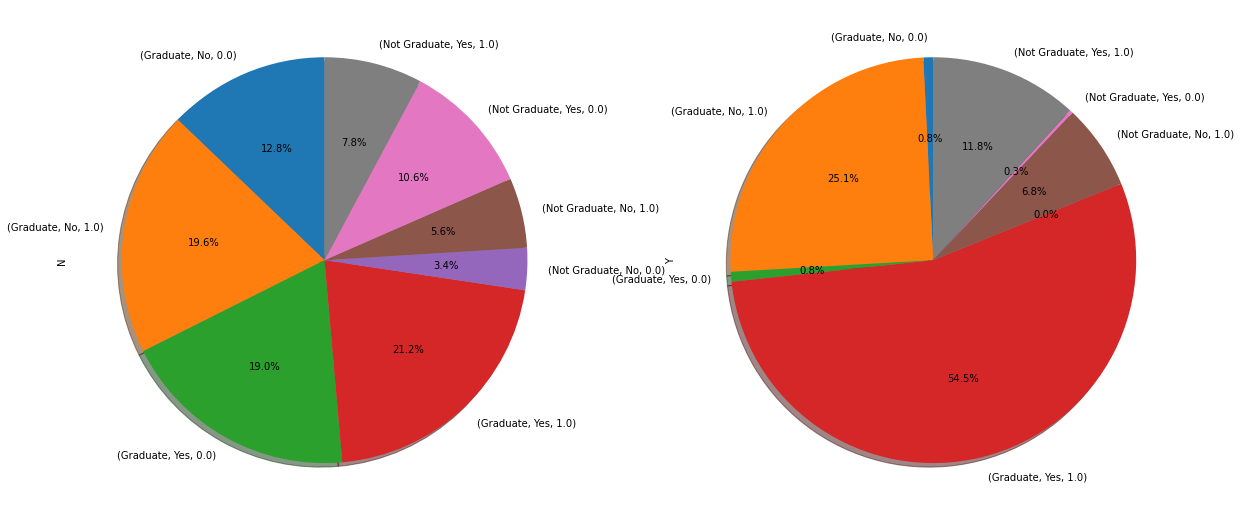

In [41]:
loan.groupby(["Education","Married","Credit_History","Loan_Status"]).size().unstack(fill_value=0).plot.pie(subplots=True,figsize=(20, 30),startangle=90,shadow=True,autopct='%1.1f%%',legend=False)

array([<AxesSubplot:ylabel='Rural'>, <AxesSubplot:ylabel='Semiurban'>,
       <AxesSubplot:ylabel='Urban'>], dtype=object)

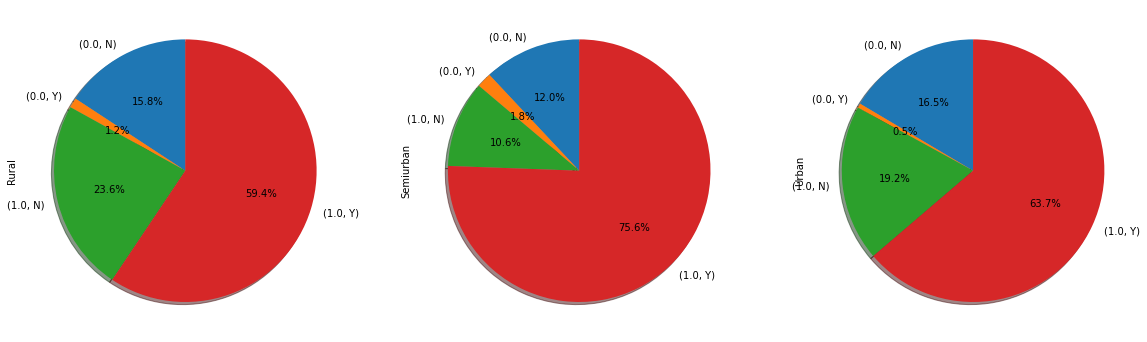

In [42]:
loan.groupby(["Credit_History","Loan_Status","Property_Area"]).size().unstack(fill_value=0).plot.pie(subplots=True,figsize=(20, 20),startangle=90,shadow=True,autopct='%1.1f%%',legend=False)

# Preprocessing

In [45]:
# drop 'loan ID' column because not usefull
loan.drop('Loan_ID', axis=1, inplace=True)

In [46]:
# ckeck duplicate entries
loan.duplicated().any()

False

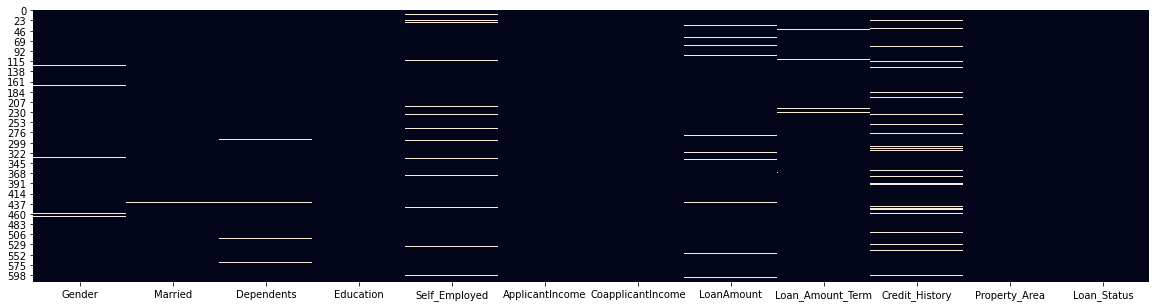

In [48]:
# visualize using Heat map
plt.figure(figsize=(20,5))
sns.heatmap(loan.isnull(), cbar=False);plt.show()

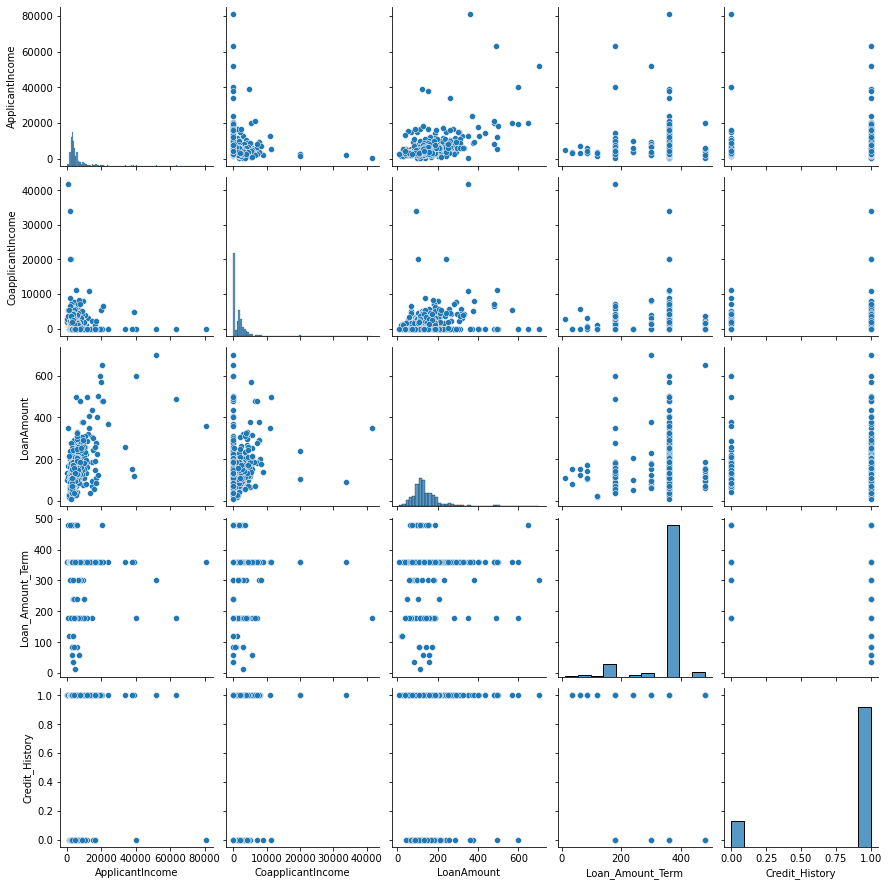

In [49]:
sns.pairplot(loan)